# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Results
In this exercise data from citipy was compared to weather data called from the Open Weather Map API. We used this data to compare latitude (ie distance from the equator) to various weather phenomenon. We learned that, as expected through common knowledge, as we moved closer to the equator in both the northern and southern hemispheres, the temperature increases. <br>
We also established that humidity is not necessarily at its highest at the equator. While in both hemispheres, heading north will show an increase in humidity. <br>
Other factors like wind speed and cloudiness showed little in the way of relation depending on latitude. <br>
<br> An issue that may effect these results is that although we used a random sample of latitudes and longitudes, there is nearly twice as many cities in the Northern Hemisphere. This may be because the global north is more heavily citied, or an issue with our dataset. <br><br>
Please find all plots printed in the WeatherPy Folder.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress


# Import API key
from api_keys import api_key
temp_units = "metric"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# create list for latitudes and longitudes
lat_lngs = []
cities = []

# use random to generate a bunch of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# get the nearest city from these values
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# only unique cities are used
    if city not in cities:
        cities.append(city)

# check if we have enough cities
len(cities)


605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Checking weather {count_one} of Set {set_one} | {city}")
    except Exception:
        print(f"{city} not found. Next...")
print("------------------------------")
print("All Done!")
print("------------------------------")    

Checking weather 1 of Set 1 | ushuaia
Checking weather 2 of Set 1 | punta arenas
Checking weather 3 of Set 1 | krasnoselkup
Checking weather 4 of Set 1 | idritsa
Checking weather 5 of Set 1 | necochea
Checking weather 6 of Set 1 | makakilo city
Checking weather 7 of Set 1 | hambantota
Checking weather 8 of Set 1 | gurupa
Checking weather 9 of Set 1 | atuona
belushya guba not found. Next...
Checking weather 10 of Set 1 | meulaboh
Checking weather 11 of Set 1 | kilindoni
Checking weather 12 of Set 1 | manadhoo
Checking weather 13 of Set 1 | bonga
Checking weather 14 of Set 1 | rikitea
Checking weather 15 of Set 1 | tessalit
Checking weather 16 of Set 1 | mys shmidta
Checking weather 17 of Set 1 | grand river south east
taolanaro not found. Next...
Checking weather 18 of Set 1 | ribeira grande
Checking weather 19 of Set 1 | albany
Checking weather 20 of Set 1 | hilo
Checking weather 21 of Set 1 | arlit
Checking weather 22 of Set 1 | hermanus
Checking weather 23 of Set 1 | fare
Checking we

Checking weather 47 of Set 4 | yantikovo
Checking weather 48 of Set 4 | vardo
Checking weather 49 of Set 4 | halifax
Checking weather 1 of Set 5 | colares
Checking weather 2 of Set 5 | pisco
Checking weather 3 of Set 5 | sovetskiy
Checking weather 4 of Set 5 | faanui
Checking weather 5 of Set 5 | sorong
Checking weather 6 of Set 5 | nenita
Checking weather 7 of Set 5 | zheleznodorozhnyy
Checking weather 8 of Set 5 | tateyama
nizhneyansk not found. Next...
Checking weather 9 of Set 5 | srednekolymsk
Checking weather 10 of Set 5 | jiguani
Checking weather 11 of Set 5 | egvekinot
Checking weather 12 of Set 5 | vestmannaeyjar
Checking weather 13 of Set 5 | guerrero negro
Checking weather 14 of Set 5 | kieta
Checking weather 15 of Set 5 | lavrentiya
Checking weather 16 of Set 5 | mana
Checking weather 17 of Set 5 | caconda
Checking weather 18 of Set 5 | oranjemund
barentsburg not found. Next...
tunduru not found. Next...
Checking weather 19 of Set 5 | mareeba
Checking weather 20 of Set 5 | 

Checking weather 45 of Set 8 | karpogory
Checking weather 46 of Set 8 | binghamton
Checking weather 47 of Set 8 | orangeburg
Checking weather 48 of Set 8 | roald
Checking weather 49 of Set 8 | birao
Checking weather 1 of Set 9 | roma
Checking weather 2 of Set 9 | vila franca do campo
Checking weather 3 of Set 9 | carutapera
Checking weather 4 of Set 9 | banda aceh
umm kaddadah not found. Next...
Checking weather 5 of Set 9 | parksville
Checking weather 6 of Set 9 | chapais
presidencia roque saenz pena not found. Next...
Checking weather 7 of Set 9 | dali
Checking weather 8 of Set 9 | tuatapere
Checking weather 9 of Set 9 | bouc-bel-air
karamea not found. Next...
Checking weather 10 of Set 9 | dingle
Checking weather 11 of Set 9 | palimbang
Checking weather 12 of Set 9 | strezhevoy
milingimbi not found. Next...
Checking weather 13 of Set 9 | daru
Checking weather 14 of Set 9 | ojhar
Checking weather 15 of Set 9 | shache
Checking weather 16 of Set 9 | takoradi
Checking weather 17 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for dataframe to reference
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
# create dataframe
weather_df = pd.DataFrame(weather_dict)

# check
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1643793302,61,-54.8000,-68.3000,5.81,11.32
1,punta arenas,100,PH,1643793126,78,8.9897,125.3400,26.63,1.26
2,krasnoselkup,100,RU,1643793302,100,65.7000,82.4667,-24.96,1.45
3,idritsa,98,RU,1643793302,93,56.3316,28.8988,-4.47,2.26
4,necochea,100,AR,1643793167,75,-38.5473,-58.7368,15.02,2.87


In [5]:
#output to csv
weather_df.to_csv('Output/weather_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_df['Humidity'].sort_values(ascending = False)
#This indicates that some cities in our list have a humidity of 100% but not over it. 
#A little research indicates that humidity levels over 100% are only really possible at very high altitudes, making it pretty unlikely for there to be cities built.

508    100
376    100
2      100
280    100
484    100
      ... 
285      7
157      7
149      7
127      7
332      7
Name: Humidity, Length: 552, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(close=None, block=None)>

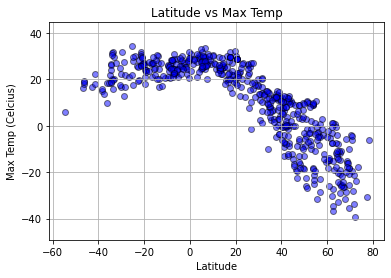

In [7]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],color  = 'blue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Max Temp")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Celcius)')
plt.ylim (min(weather_df['Max Temp'])-10, max(weather_df['Max Temp']) + 10)
plt.savefig('Output/fig1.png')
plt.show

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

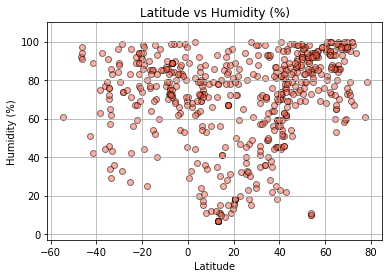

In [8]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],color  = 'tomato', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Humidity (%)")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim (min(weather_df['Humidity'])-10, max(weather_df['Humidity']) + 10)
plt.savefig('Output/fig2.png')
plt.show

## Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(close=None, block=None)>

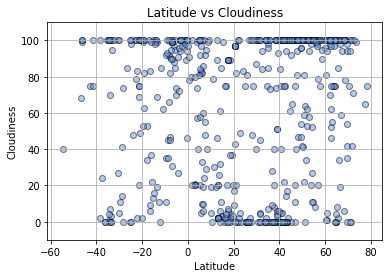

In [9]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Cloudiness")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.ylim (min(weather_df['Cloudiness'])-10, max(weather_df['Cloudiness']) + 10)
plt.savefig('Output/fig3.png')
plt.show

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

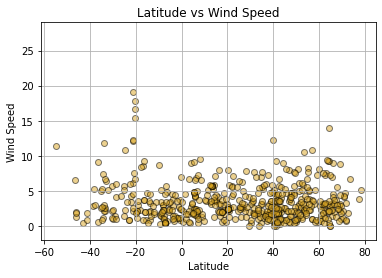

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],color  = 'goldenrod', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.title("Latitude vs Wind Speed")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim (min(weather_df['Wind Speed'])-2, max(weather_df['Wind Speed']) + 10)
plt.savefig('Output/fig4.png')
plt.show

## Linear Regression

In [11]:
#split the data into northern and southern hemispheres
north_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
south_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]
#compare sample sizees
size_north = (len(north_df))
size_south = (len(south_df))
print(size_north)
print(size_south)

407
145


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.78x + 35.4
The r-squared is: -0.8857791219547453
There is a negative correlation.
The closer you are to be equator in the Northern Hemisphere, the warmer it is.


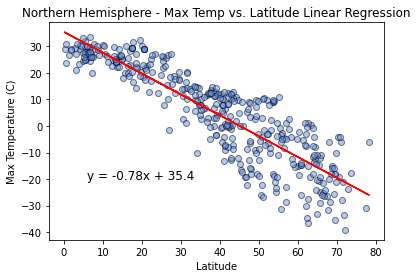

<Figure size 432x288 with 0 Axes>

In [12]:
#set variables
x_val = north_df['Lat']
y_val = north_df['Max Temp']

#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(6,-20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a negative correlation.")
print("The closer you are to be equator in the Northern Hemisphere, the warmer it is.")
plt.show()
plt.savefig('Output/fig5.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.16x + 26.98
The r-squared is: 0.4266245580532104
There is a positive correlation.
The closer you are to the equator in the Southern Hemisphere, the warmer it is.


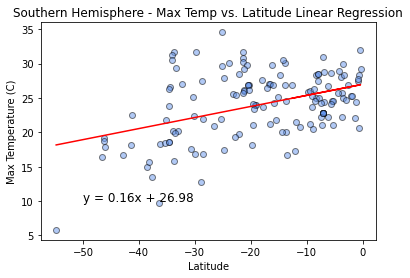

<Figure size 432x288 with 0 Axes>

In [13]:
#set variables
x_val = south_df['Lat']
y_val = south_df['Max Temp']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-50,10),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("The closer you are to the equator in the Southern Hemisphere, the warmer it is.")
plt.show()
plt.savefig('Output/fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.61x + 45.51
The r-squared is: 0.4761787588089472
There is a positive correlation.
Moving away from the equator in the northern hemisphere sees an increase in humidity.


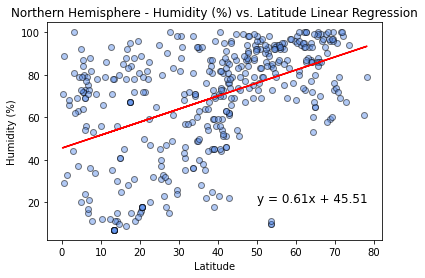

<Figure size 432x288 with 0 Axes>

In [14]:
#set variables
x_val = north_df['Lat']
y_val = north_df['Humidity']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(50,20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("Moving away from the equator in the northern hemisphere sees an increase in humidity.")
plt.show()
plt.savefig('Output/fig7.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 80.35
The r-squared is: 0.1680515678014331
There is a weak positive correlation.
Moving toward the equator in the sounthern hemisphere does increase humidity, but not by very much


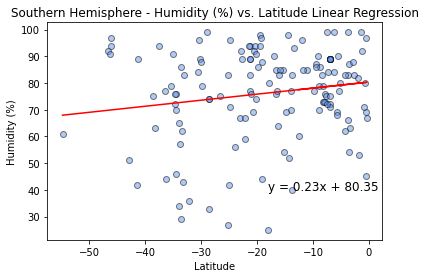

<Figure size 432x288 with 0 Axes>

In [15]:
x_val = south_df['Lat']
y_val = south_df['Humidity']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-18,40),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving toward the equator in the sounthern hemisphere does increase humidity, but not by very much")
plt.show()
plt.savefig('Output/fig8.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.48x + 38.61
The r-squared is: 0.22753758256163084
There is a weak positive correlation.
Moving away from the equator in the northern hemisphere does increase cloudiness, however there the correlation is not strong.


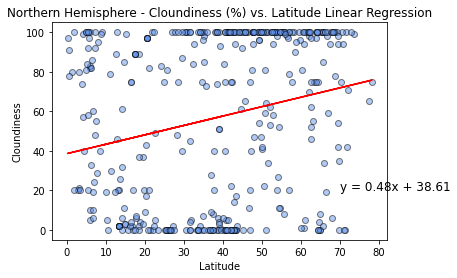

<Figure size 432x288 with 0 Axes>

In [16]:
x_val = north_df['Lat']
y_val = north_df['Cloudiness']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(70,20),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloundiness')
plt.title('Northern Hemisphere - Cloundiness (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving away from the equator in the northern hemisphere does increase cloudiness, however there the correlation is not strong.")
plt.show()
plt.savefig('Output/fig9.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.8x + 84.13
The r-squared is: 0.27502451713282233
There is a positive correlation.
Moving toward the equator in the northern hemisphere does increase cloudiness, however the correlation is not strong.


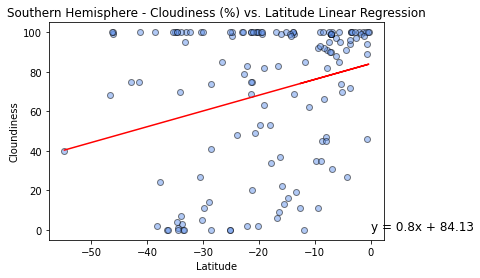

<Figure size 432x288 with 0 Axes>

In [17]:
x_val = south_df['Lat']
y_val = south_df['Cloudiness']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(0,0),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloundiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a positive correlation.")
print("Moving toward the equator in the northern hemisphere does increase cloudiness, however the correlation is not strong.")
plt.show()
plt.savefig('Output/fig10.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 3.33
The r-squared is: 0.0030154845591016375
There is a weak positive correlation.
Moving away from the equator in the northern hemisphere does increase windiness, but there is only just a positive correlation.


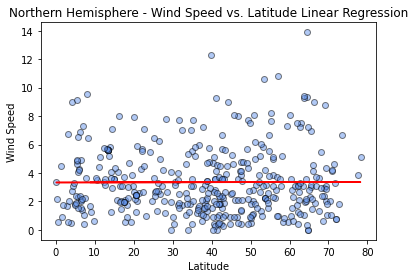

<Figure size 432x288 with 0 Axes>

In [18]:
x_val = north_df['Lat']
y_val = north_df['Wind Speed']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(0,15),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak positive correlation.")
print("Moving away from the equator in the northern hemisphere does increase windiness, but there is only just a positive correlation.")
plt.show()
plt.savefig('Output/fig11.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 2.59
The r-squared is: -0.20226298188207292
There is a weak negative correlation.
Moving toward the equator in the southern hemisphere does decrease wind speed, but not by very much.


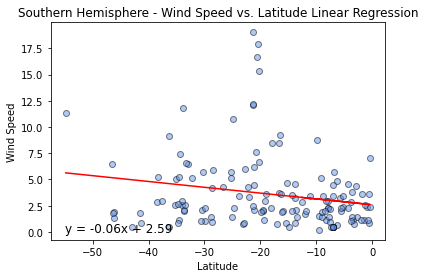

<Figure size 432x288 with 0 Axes>

In [19]:
x_val = south_df['Lat']
y_val = south_df['Wind Speed']
#linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line}")
#plot
plt.scatter(x_val,y_val, color  = 'cornflowerblue', alpha = .5, linewidth = 1, edgecolor = 'black')
plt.plot(x_val,regress_values,"r-")
plt.annotate(line,(-55,0),fontsize=12,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

print(f"The r-squared is: {rvalue}")
print("There is a weak negative correlation.")
print("Moving toward the equator in the southern hemisphere does decrease wind speed, but not by very much.")
plt.show()
plt.savefig('Output/fig12.png')